# Load and Inspect Dataset

In [28]:
import pandas as pd

# Load dataset
file_path = '1901_2019_BD_weather.csv'
weather_data = pd.read_csv(file_path)

# Inspect the dataset
print(weather_data.head())
print(weather_data.info())
print(weather_data.describe())


   Year  Month  Temperature     Rain
0  1901      1         16.98   18.54
1  1901      2         19.90   16.25
2  1901      3         24.32   70.80
3  1901      4         28.18   66.16
4  1901      5         27.89  267.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1428 non-null   int64  
 1   Month         1428 non-null   int64  
 2   Temperature   1428 non-null   float64
 3   Rain          1428 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 44.8 KB
None
              Year        Month  Temperature          Rain
count  1428.000000  1428.000000   1428.000000  1428.000000
mean   1960.000000     6.500000     25.078908   202.796317
std      34.363162     3.453262      3.682308   201.972584
min    1901.000000     1.000000     16.800000     0.000000
25%    1930.000000     3.750000     22.120000    18.600000
50% 

# Clean Column Names

In [29]:
# Strip extra spaces from column names
weather_data.columns = weather_data.columns.str.strip()


# Data Visualization

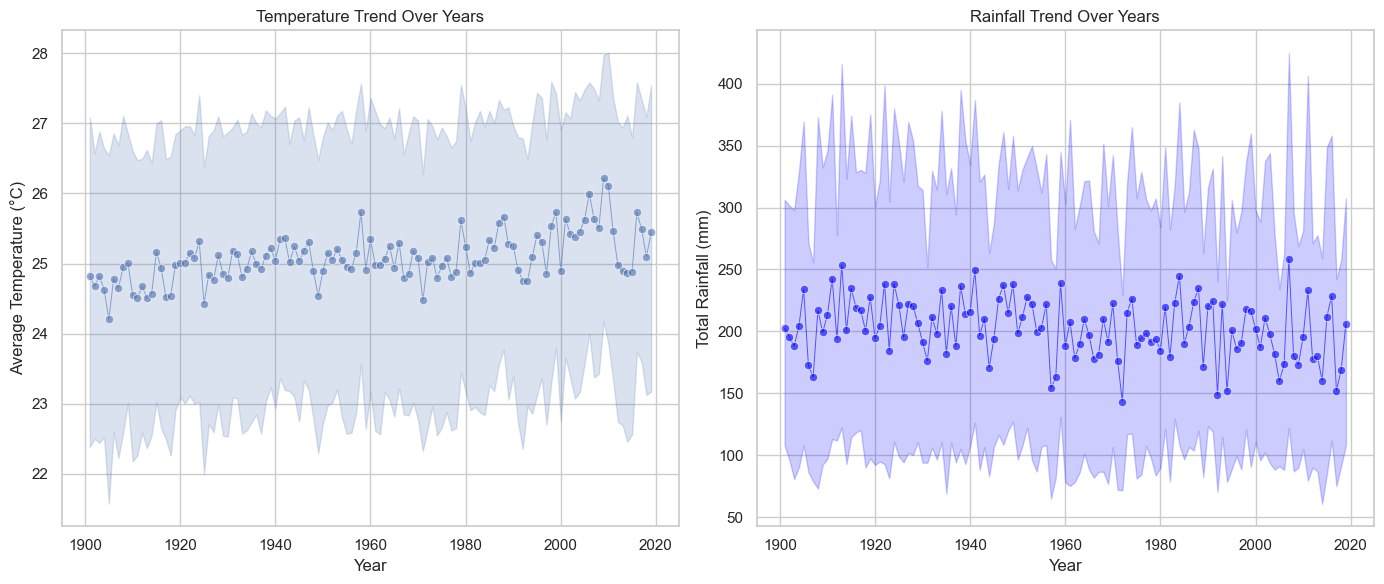

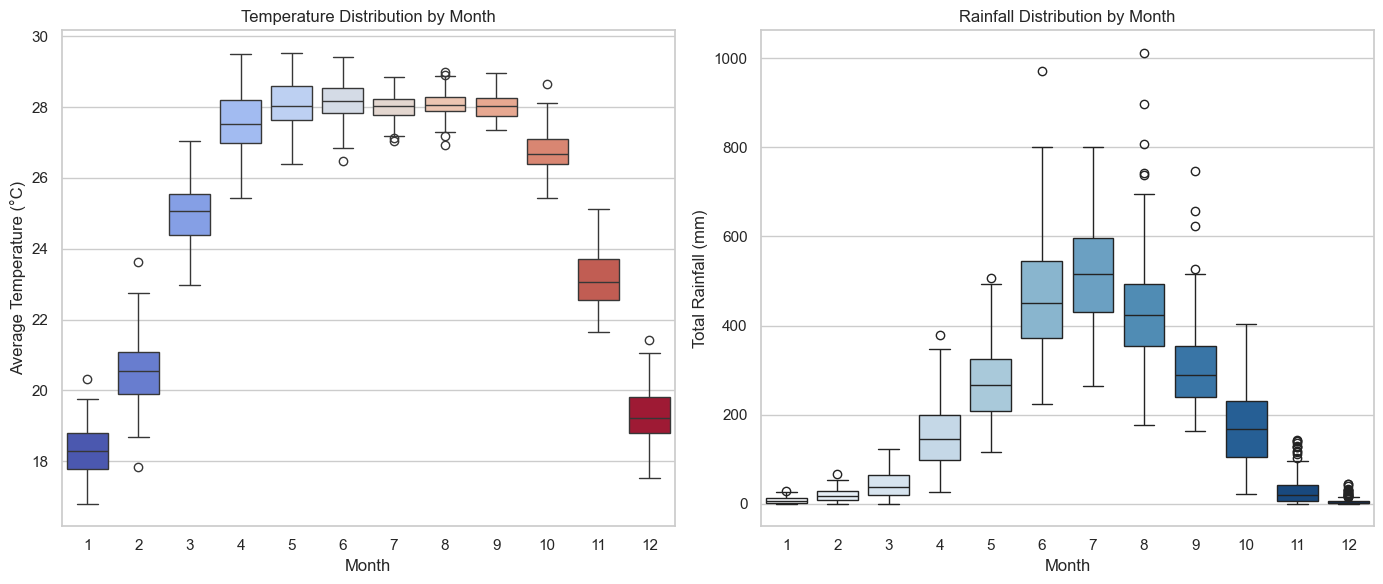

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# Line plot for trends over time
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='Temperature', data=weather_data, marker='o', alpha=0.6, linewidth=0.7)
plt.title('Temperature Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Rain', data=weather_data, marker='o', alpha=0.6, linewidth=0.7, color='blue')
plt.title('Rainfall Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')

plt.tight_layout()
plt.show()

# Boxplots for seasonal (monthly) patterns
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Month', y='Temperature', data=weather_data, palette='coolwarm', hue='Month', dodge=False, legend=False)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend([], [], frameon=False)  # Suppress legend

plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Rain', data=weather_data, palette='Blues', hue='Month', dodge=False, legend=False)
plt.title('Rainfall Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.legend([], [], frameon=False)  # Suppress legend

plt.tight_layout()
plt.show()



# UnSupervised Learning Model

1. Select Features for Clustering

In [32]:
# Selecting features for clustering
clustering_data = weather_data[['Temperature', 'Rain']]


2. Scale Features

In [33]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)



3. Apply K-Means Clustering

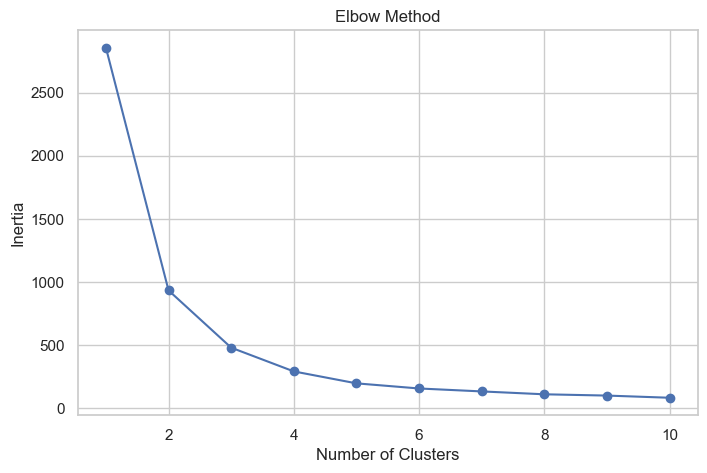

In [34]:
# Find the Optimal Number of Clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test different cluster sizes
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [35]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the original dataset
weather_data['Cluster'] = clusters


4. Visualize Clusters

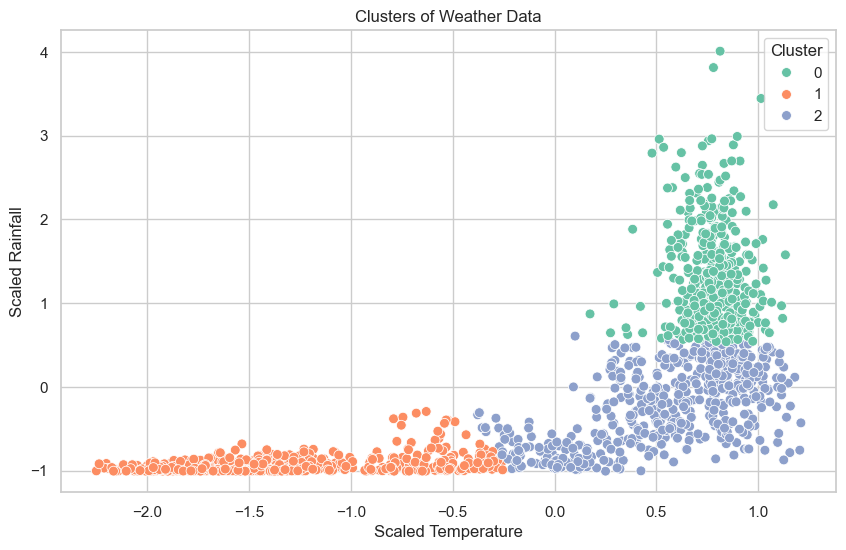

In [36]:
import seaborn as sns

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data_scaled[:, 0], 
    y=clustering_data_scaled[:, 1], 
    hue=weather_data['Cluster'], 
    palette='Set2', 
    s=50
)
plt.title('Clusters of Weather Data')
plt.xlabel('Scaled Temperature')
plt.ylabel('Scaled Rainfall')
plt.legend(title='Cluster')
plt.show()


# Example new input data

In [37]:
new_data = pd.DataFrame({
    'Temperature': [27.5],  # Average temperature in Celsius
    'Rain': [150.0]        # Rainfall in mm
})

# Scale the new input data
new_data_scaled = scaler.transform(new_data)

# Predict the cluster
predicted_cluster = kmeans.predict(new_data_scaled)
print(f"The new data belongs to Cluster: {predicted_cluster[0]}")


The new data belongs to Cluster: 2
